In [ ]:
!pip install imbalanced-learn
!pip install shap

import math
from sklearn.ensemble import RandomForestClassifier
from math import ceil
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from google.colab import drive
drive.mount('/content/drive')
from scipy.stats import zscore
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
import shap


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

file_path_df_client= '/content/drive/MyDrive/Ghazal Project/client_train.csv'
df_client= pd.read_csv(file_path_df_client)

file_path_df_invoice = '/content/drive/MyDrive/Ghazal Project/invoice_train.csv'
df_invoice= pd.read_csv(file_path_df_invoice )

<ipython-input-2-feb3aa13bb4d>:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_invoice= pd.read_csv(file_path_df_invoice )


In [ ]:
#shape of dataframe
print("Client Train dataset shape: ", df_client.shape)
print("Invoice train dataset shape: ", df_invoice.shape)

Client Train dataset shape:  (135493, 6)
Invoice train dataset shape:  (4476749, 16)


In [ ]:
df_client.columns

Index(['disrict', 'client_id', 'client_catg', 'region', 'creation_date',
       'target'],
      dtype='object')

###Distriburion of Clent Category

In [ ]:
'''#Distribution of client Category
df_client['creation_date'] = pd.to_datetime(df_client['creation_date'])
client_catg_counts = df_client['client_catg'].value_counts()
plt.figure(figsize=(8, 6))
client_catg_counts.plot(kind='bar')
plt.title('Distribution of client_catg')
plt.xlabel('Client Category')
plt.ylabel('Count')
plt.show()'''



"#Distribution of client Category\ndf_client['creation_date'] = pd.to_datetime(df_client['creation_date'])\nclient_catg_counts = df_client['client_catg'].value_counts()\nplt.figure(figsize=(8, 6))\nclient_catg_counts.plot(kind='bar')\nplt.title('Distribution of client_catg')\nplt.xlabel('Client Category')\nplt.ylabel('Count')\nplt.show()"

###Distribution of Target

In [ ]:
#Distribution of Target

'''client_catg_counts = df_client['target'].value_counts()

total_count = client_catg_counts.sum()
percentage = client_catg_counts / total_count * 100

plt.figure(figsize=(8, 6))
bars = client_catg_counts.plot(kind='bar')


for i, count in enumerate(client_catg_counts):
    plt.text(i, count + 0.5, f'{percentage[i]:.2f}%', ha='center', va='bottom')

plt.title('Distribution of Target')
plt.xlabel('Target')
plt.ylabel('Count')

plt.show()'''


"client_catg_counts = df_client['target'].value_counts()\n\ntotal_count = client_catg_counts.sum()\npercentage = client_catg_counts / total_count * 100\n\nplt.figure(figsize=(8, 6))\nbars = client_catg_counts.plot(kind='bar')\n\n\nfor i, count in enumerate(client_catg_counts):\n    plt.text(i, count + 0.5, f'{percentage[i]:.2f}%', ha='center', va='bottom')\n\nplt.title('Distribution of Target')\nplt.xlabel('Target')\nplt.ylabel('Count')\n\nplt.show()"

###Distribution of Counter Type

In [ ]:
'''#Distribution of Counter Type
counter_type_counts = df_invoice['counter_type'].value_counts()
total_count = counter_type_counts.sum()
percentage = counter_type_counts / total_count * 100

plt.figure(figsize=(10, 6))
bars = counter_type_counts.sort_index().plot(kind='bar')

# Add percentage labels on the bars
for i, count in enumerate(counter_type_counts):
    plt.text(i, count + 0.5, f'{percentage[i]:.2f}%', ha='center', va='bottom')

plt.title('Distribution of Counter Type')
plt.xlabel('Counter Type')
plt.ylabel('Count')

plt.show()'''

"#Distribution of Counter Type\ncounter_type_counts = df_invoice['counter_type'].value_counts()\ntotal_count = counter_type_counts.sum()\npercentage = counter_type_counts / total_count * 100\n\nplt.figure(figsize=(10, 6))\nbars = counter_type_counts.sort_index().plot(kind='bar')\n\n# Add percentage labels on the bars\nfor i, count in enumerate(counter_type_counts):\n    plt.text(i, count + 0.5, f'{percentage[i]:.2f}%', ha='center', va='bottom')\n\nplt.title('Distribution of Counter Type')\nplt.xlabel('Counter Type')\nplt.ylabel('Count')\n\nplt.show()"

###Merging Dataset

In [ ]:
df_merge = pd.merge(df_client, df_invoice, on='client_id')

df_merge['invoice_date'] = pd.to_datetime(df_merge['invoice_date'])
df_merge = df_merge[df_merge['invoice_date'].dt.year >= 2007]

###Distribution of Target in Client Category

In [ ]:
'''#Distribution of Target in Client Category
total_counts = df_merge.groupby('client_catg')['target'].count()
target_counts = df_merge.groupby(['client_catg', 'target']).size()
percentage = (target_counts / total_counts).reset_index(name='percentage')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='client_catg', y='percentage', hue='target', data=percentage)
plt.title('Target Distribution in Client Category')
plt.xlabel('Client Category')
plt.ylabel('Target Percentage')

for p in ax.patches:
    height = p.get_height()
    if height != 0:
        ax.annotate(f'{height:.2f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.show()'''


"#Distribution of Target in Client Category\ntotal_counts = df_merge.groupby('client_catg')['target'].count()\ntarget_counts = df_merge.groupby(['client_catg', 'target']).size()\npercentage = (target_counts / total_counts).reset_index(name='percentage')\n\nplt.figure(figsize=(10, 6))\nax = sns.barplot(x='client_catg', y='percentage', hue='target', data=percentage)\nplt.title('Target Distribution in Client Category')\nplt.xlabel('Client Category')\nplt.ylabel('Target Percentage')\n\nfor p in ax.patches:\n    height = p.get_height()\n    if height != 0:\n        ax.annotate(f'{height:.2f}%',\n                    (p.get_x() + p.get_width() / 2., height),\n                    ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),\n                    textcoords='offset points')\n\nplt.show()"

###Distrubution of target in counter type

In [ ]:
'''#Distrubution of target in counter type

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='counter_type', hue='target', data=df_merge)

total = len(df_merge)

# Adding percentage labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 3,
                '{:.2f}%'.format((height / total) * 100),
                ha="center")

plt.title('Target Distribution in Counter Type')
plt.xlabel('Counter Type')
plt.ylabel('Target Count')
plt.show()'''


'#Distrubution of target in counter type\n\nplt.figure(figsize=(10, 6))\nax = sns.countplot(x=\'counter_type\', hue=\'target\', data=df_merge)\n\ntotal = len(df_merge)\n\n# Adding percentage labels\nfor p in ax.patches:\n    height = p.get_height()\n    if height > 0:\n        ax.text(p.get_x() + p.get_width() / 2.,\n                height + 3,\n                \'{:.2f}%\'.format((height / total) * 100),\n                ha="center")\n\nplt.title(\'Target Distribution in Counter Type\')\nplt.xlabel(\'Counter Type\')\nplt.ylabel(\'Target Count\')\nplt.show()'

###Distribution of Target in Region

In [ ]:
'''
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='disrict', hue='target', data=df_merge)

total = len(df_merge)

# Adding percentage labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Display percentage only if the height is greater than 0
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 3,
                '{:.2f}%'.format((height / total) * 100),
                ha="center")

plt.title('Target Distribution in Region')
plt.xlabel('Region')
plt.ylabel('Target Count')
plt.show()'''


'import matplotlib.pyplot as plt\nimport seaborn as sns\n\nplt.figure(figsize=(10, 6))\nax = sns.countplot(x=\'disrict\', hue=\'target\', data=df_merge)\n\ntotal = len(df_merge)  # Total count in the dataframe\n\n# Adding percentage labels\nfor p in ax.patches:\n    height = p.get_height()\n    if height > 0:  # Display percentage only if the height is greater than 0\n        ax.text(p.get_x() + p.get_width() / 2.,\n                height + 3,\n                \'{:.2f}%\'.format((height / total) * 100),\n                ha="center")\n\nplt.title(\'Target Distribution in Region\')\nplt.xlabel(\'Region\')\nplt.ylabel(\'Target Count\')\nplt.show()'

###Data Cleaning

In [ ]:
missing_values = df_merge.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
disrict                 0
client_id               0
client_catg             0
region                  0
creation_date           0
target                  0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64


In [ ]:
duplicate_rows = df_merge[df_merge.duplicated()]

if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found:")
    print(duplicate_rows)


Duplicate rows found:
         disrict            client_id  client_catg  region creation_date  \
951893        60  train_Client_125864           11     101    29/12/1998   
1755798       62   train_Client_25894           11     301    16/06/1995   
2137999       60    train_Client_3636           11     101    21/11/1988   
2163374       60   train_Client_37069           11     101    09/03/1990   
2433919       60   train_Client_44407           11     101    15/06/1989   
2805729       60   train_Client_54609           11     101    16/02/1994   
3394719       62    train_Client_7066           11     304    12/04/2013   
3462929       60   train_Client_72519           11     101    03/06/1982   
3628821       63   train_Client_77029           51     312    27/02/2010   

         target invoice_date  tarif_type  counter_number counter_statue  ...  \
951893      0.0   2011-12-12          11          101545              5  ...   
1755798     0.0   2010-07-13          40         6986740 

In [ ]:
#Remove duplicate rows
df_merge.drop_duplicates()

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60,train_Client_0,11,101,31/12/1994,0.0,2014-03-24,11,1335667,0,...,8,1,82,0,0,0,14302,14384,4,ELEC
1,60,train_Client_0,11,101,31/12/1994,0.0,2013-03-29,11,1335667,0,...,6,1,1200,184,0,0,12294,13678,4,ELEC
2,60,train_Client_0,11,101,31/12/1994,0.0,2015-03-23,11,1335667,0,...,8,1,123,0,0,0,14624,14747,4,ELEC
3,60,train_Client_0,11,101,31/12/1994,0.0,2015-07-13,11,1335667,0,...,8,1,102,0,0,0,14747,14849,4,ELEC
4,60,train_Client_0,11,101,31/12/1994,0.0,2016-11-17,11,1335667,0,...,9,1,572,0,0,0,15066,15638,12,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476739,63,train_Client_99997,11,311,22/11/2011,0.0,2013-12-06,11,262195,0,...,9,1,282,0,0,0,1608,1890,4,ELEC
4476740,63,train_Client_99997,11,311,22/11/2011,0.0,2014-02-17,11,262195,0,...,9,1,341,0,0,0,2221,2562,4,ELEC
4476741,63,train_Client_99997,11,311,22/11/2011,0.0,2014-02-17,40,0,0,...,9,1,118,0,0,0,406,524,4,GAZ
4476742,63,train_Client_99997,11,311,22/11/2011,0.0,2014-06-13,11,262195,0,...,9,1,312,0,0,0,2562,2874,4,ELEC


In [ ]:
# Check for duplicate rows
duplicate_rows = df_merge[df_merge.duplicated()]

if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found:")
    print(duplicate_rows)


Duplicate rows found:
         disrict            client_id  client_catg  region creation_date  \
951893        60  train_Client_125864           11     101    29/12/1998   
1755798       62   train_Client_25894           11     301    16/06/1995   
2137999       60    train_Client_3636           11     101    21/11/1988   
2163374       60   train_Client_37069           11     101    09/03/1990   
2433919       60   train_Client_44407           11     101    15/06/1989   
2805729       60   train_Client_54609           11     101    16/02/1994   
3394719       62    train_Client_7066           11     304    12/04/2013   
3462929       60   train_Client_72519           11     101    03/06/1982   
3628821       63   train_Client_77029           51     312    27/02/2010   

         target invoice_date  tarif_type  counter_number counter_statue  ...  \
951893      0.0   2011-12-12          11          101545              5  ...   
1755798     0.0   2010-07-13          40         6986740 

###Outliers Detection Percentage

In [ ]:
#Outliers
for column in df_merge.columns:

    if column == 'target':
        continue

    if df_merge[column].dtype in ['object', 'datetime64[ns]']:
        continue

    z_scores = zscore(df_merge[column])
    z_threshold = 3

    outliers_mask = (z_scores < -z_threshold) | (z_scores > z_threshold)

    outliers_percentage = outliers_mask.mean() * 100

    print(f'Percentage of Outliers in {column}: {outliers_percentage:.2f}%')


Percentage of Outliers in disrict: 0.00%
Percentage of Outliers in client_catg: 2.43%
Percentage of Outliers in region: 0.00%
Percentage of Outliers in tarif_type: 0.00%
Percentage of Outliers in counter_number: 0.39%
Percentage of Outliers in counter_code: 0.02%
Percentage of Outliers in reading_remarque: 0.00%
Percentage of Outliers in counter_coefficient: 0.04%
Percentage of Outliers in consommation_level_1: 0.44%
Percentage of Outliers in consommation_level_2: 0.46%
Percentage of Outliers in consommation_level_3: 1.88%
Percentage of Outliers in consommation_level_4: 0.55%
Percentage of Outliers in old_index: 1.12%
Percentage of Outliers in new_index: 1.14%
Percentage of Outliers in months_number: 0.03%


In [ ]:
df_merge.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4168203 entries, 0 to 4476743
Data columns (total 21 columns):
 #   Column                Dtype         
---  ------                -----         
 0   disrict               int64         
 1   client_id             object        
 2   client_catg           int64         
 3   region                int64         
 4   creation_date         object        
 5   target                float64       
 6   invoice_date          datetime64[ns]
 7   tarif_type            int64         
 8   counter_number        int64         
 9   counter_statue        object        
 10  counter_code          int64         
 11  reading_remarque      int64         
 12  counter_coefficient   int64         
 13  consommation_level_1  int64         
 14  consommation_level_2  int64         
 15  consommation_level_3  int64         
 16  consommation_level_4  int64         
 17  old_index             int64         
 18  new_index             int64         
 19  

In [ ]:
df_merge['target'] = df_merge['target'].astype('int')

In [ ]:

df_merge['client_catg'] = df_merge['client_catg'].astype('object')
df_merge['disrict'] = df_merge['disrict'].astype('object')
df_merge['reading_remarque'] = df_merge['reading_remarque'].astype('object')
df_merge['target'] = df_merge['target'].astype('int')
df_merge['invoice_date'] = pd.to_datetime(df_merge['invoice_date'], dayfirst=True)
df_merge['invoice_month'] =df_merge['invoice_date'].dt.month
df_merge['invoice_month'] = df_merge['invoice_month'].astype('object')

In [ ]:
df_merge.drop(columns="creation_date", inplace=True)

In [ ]:
df_merge.drop(columns="client_id", inplace=True)

In [ ]:
categorical_columns = df_merge.select_dtypes(include='category').columns
print("Categorical Columns:", categorical_columns)


Categorical Columns: Index([], dtype='object')


In [ ]:
df_merge.drop('invoice_date', axis=1, inplace=True)


In [ ]:
df_merge = df_merge.loc[:, ~df_merge.columns.duplicated()]

###Checking Features Importance

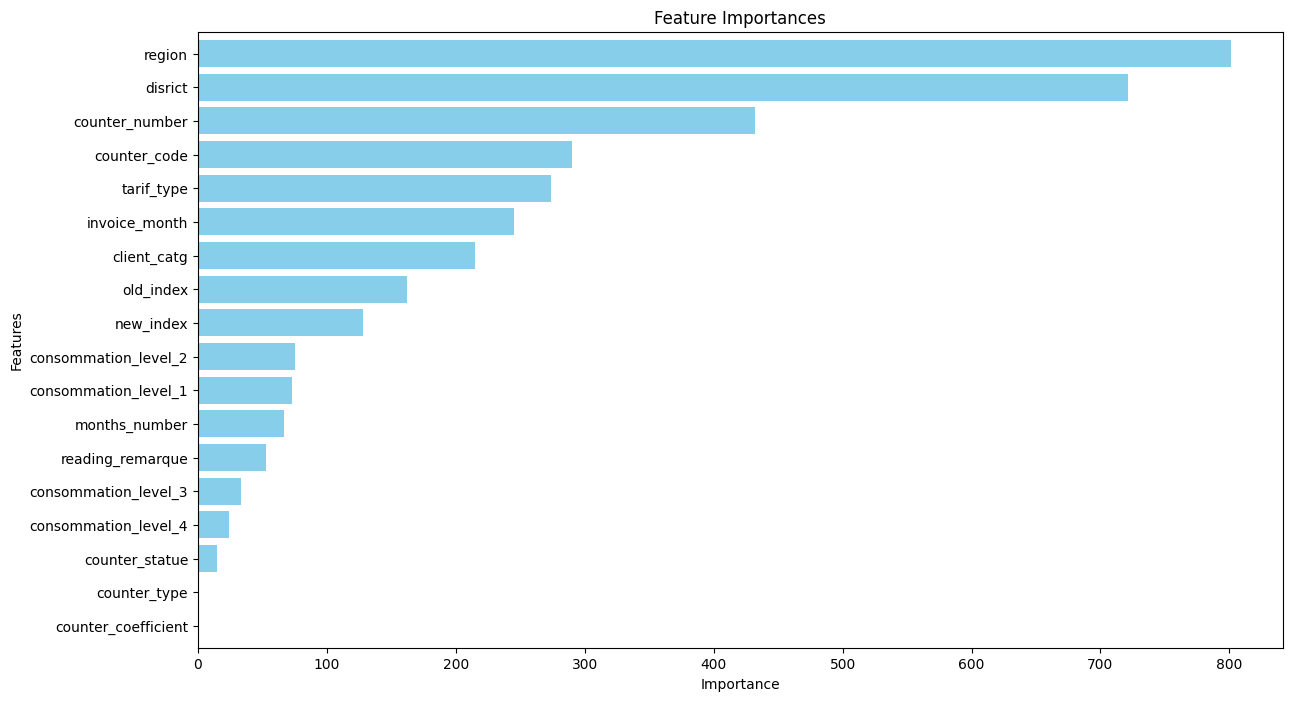

In [ ]:

categorical_columns = ['disrict', 'client_catg', 'counter_statue', 'reading_remarque', 'counter_type', 'invoice_month']
for col in categorical_columns:
    df_merge[col] = df_merge[col].astype('category')

X = df_merge.drop(['target'], axis=1)
y = df_merge['target']

model = XGBClassifier(enable_categorical=True)  # Enable categorical support

cumulative_importances = None

batch_size = 1000

for i in range(0, len(X), batch_size):
    X_batch = X.iloc[i:i+batch_size, :]
    y_batch = y.iloc[i:i+batch_size]

    model = XGBClassifier(enable_categorical=True)

    model.fit(X_batch, y_batch)

    if cumulative_importances is None:
        cumulative_importances = model.feature_importances_
    else:
        cumulative_importances += model.feature_importances_

feature_importance = pd.Series(cumulative_importances, index=X.columns).sort_values()

plt.figure(figsize=(14, 8))
feature_importance.plot(kind='barh', color='skyblue', width=0.8)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.yticks(fontsize=10)
plt.show()


###Remove Features

In [ ]:
df_merge.drop(['counter_statue', 'counter_type', 'counter_statue' ], axis=1, inplace=True)
print("Shape of df_merge after dropping features:", df_merge.shape)


Shape of df_merge after dropping features: (4168203, 17)


In [ ]:
print(df_merge.columns)

Index(['disrict', 'client_catg', 'region', 'target', 'tarif_type',
       'counter_number', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'invoice_month'],
      dtype='object')


###Modeling

In [ ]:

X = df_merge.drop(['target'], axis=1)
y = df_merge['target']

##OverSampling to minimize the imbalance classs issue
oversampler = RandomOverSampler(random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X, y)

##Slpit into Test and TRain
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

###XGBoost Classifier
model = XGBClassifier(enable_categorical=True)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

###Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Step 8: Print the evaluation metrics
print("Evaluation Metrics with Oversampling:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Evaluation Metrics with Oversampling:
Accuracy: 0.6746129377377398
Precision: 0.6800695048251562
Recall: 0.6594568531887722
F1-score: 0.6696045851110916
ROC-AUC Score: 0.6746128784869148


###SHapley Additive exPlanations(SHAP)




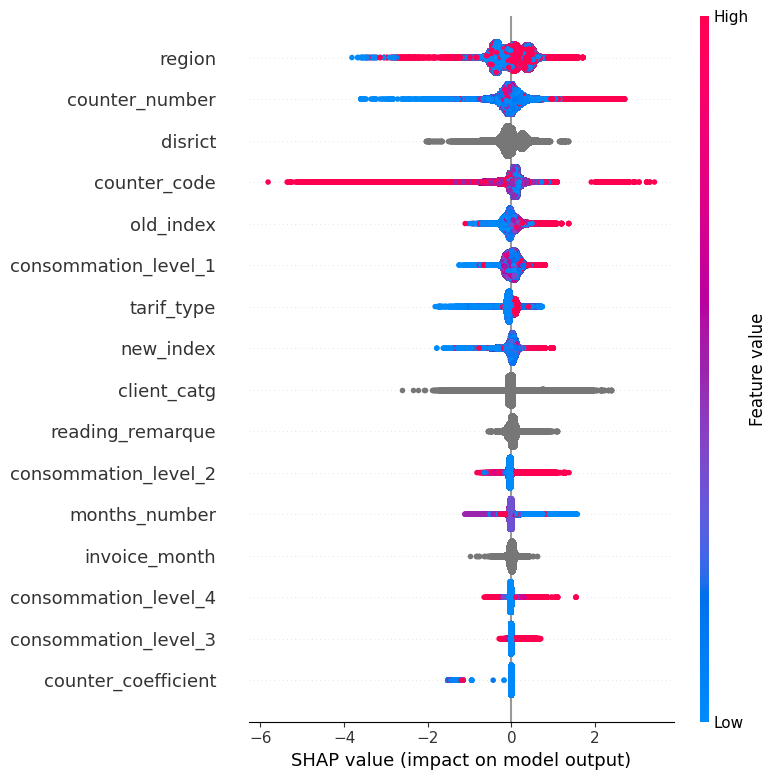

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
